# Point 2 - Regression (60%)

## 2.1 Use the dataset from the data folder. 'Pruebas_saber_2023.xlsx' (It is a base without the score columns different from the previous point), the use case is that based on the student's conditions we are going to predict the score they will have in the knowledge tests in critical reading " MOD_LECTURA_CRITICA_PUNT”.

### 2.1.1 What variables are important in predicting value? - Data exploration 

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("./data/point2/pruebas_saber_2023_var_exploration.xlsx")
dataFrame = pd.DataFrame(data=df,
                         columns = [
    'DOCUMENTO_CC', 
    'GENERO_MASCULINO', 
    'EDAD', 
    'RESIDE_CABECERA_MUNICIPAL', 
    'TIENE_PAREJA', 
    'PAGO_PROPIO', 
    'CURSO_PREPARACION', 
    'SIMULACRO', 
    'SEMESTRE', 
    'ESTRATO', 
    'INTERNET', 
    'COMPUTADOR', 
    'ESTU_INSE_INDIVIDUAL', 
    'ESTU_NSE_INDIVIDUAL', 
    'ESTU_NSE_IES', 
    'MOD_LECTURA_CRITICA_PUNT'
])
dataFrame

,DOCUMENTO_CC,GENERO_MASCULINO,EDAD,RESIDE_CABECERA_MUNICIPAL,TIENE_PAREJA,PAGO_PROPIO,CURSO_PREPARACION,SIMULACRO,SEMESTRE,ESTRATO,INTERNET,COMPUTADOR,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,MOD_LECTURA_CRITICA_PUNT
0,0,0,23.0,1,0,0.0,0.0,0.0,10,2.0,1.0,0.0,61.403944,4.0,3,164
1,1,1,21.0,1,0,0.0,0.0,0.0,9,1.0,0.0,0.0,53.902622,2.0,3,132
2,1,0,21.0,0,0,0.0,0.0,0.0,9,2.0,1.0,1.0,65.881886,4.0,3,150
3,1,0,22.0,0,0,0.0,1.0,1.0,9,2.0,1.0,1.0,71.978823,4.0,3,141
4,1,1,22.0,1,0,0.0,0.0,0.0,9,3.0,1.0,0.0,67.067764,4.0,3,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139283,1,0,22.0,0,0,NaN,NaN,NaN,8,NaN,NaN,NaN,59.912471,4.0,2,131
139284,1,1,25.0,1,0,NaN,NaN,NaN,8,NaN,NaN,NaN,56.499579,3.0,2,146
139285,1,1,28.0,1,0,NaN,NaN,NaN,9,NaN,NaN,NaN,58.080184,3.0,3,93
139286,1,1,23.0,1,0,NaN,NaN,NaN,9,NaN,NaN,NaN,60.075855,4.0,3,91


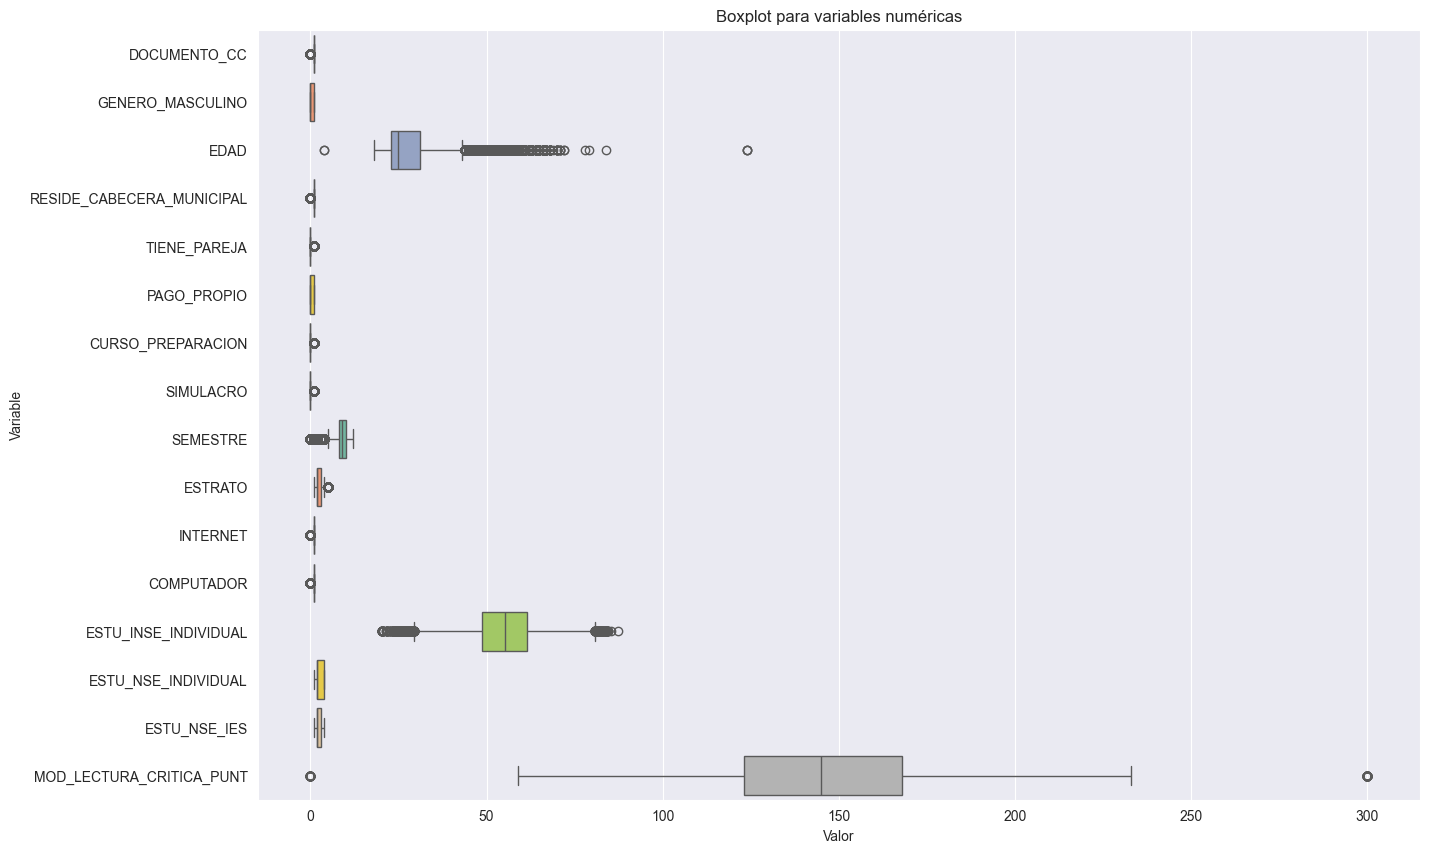

In [4]:
numericColumns = dataFrame.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
sns.boxplot(data=dataFrame[numericColumns], orient="h", palette="Set2")
plt.title('Boxplot para variables numéricas')
plt.xlabel('Valor')
plt.ylabel('Variable')
plt.show()

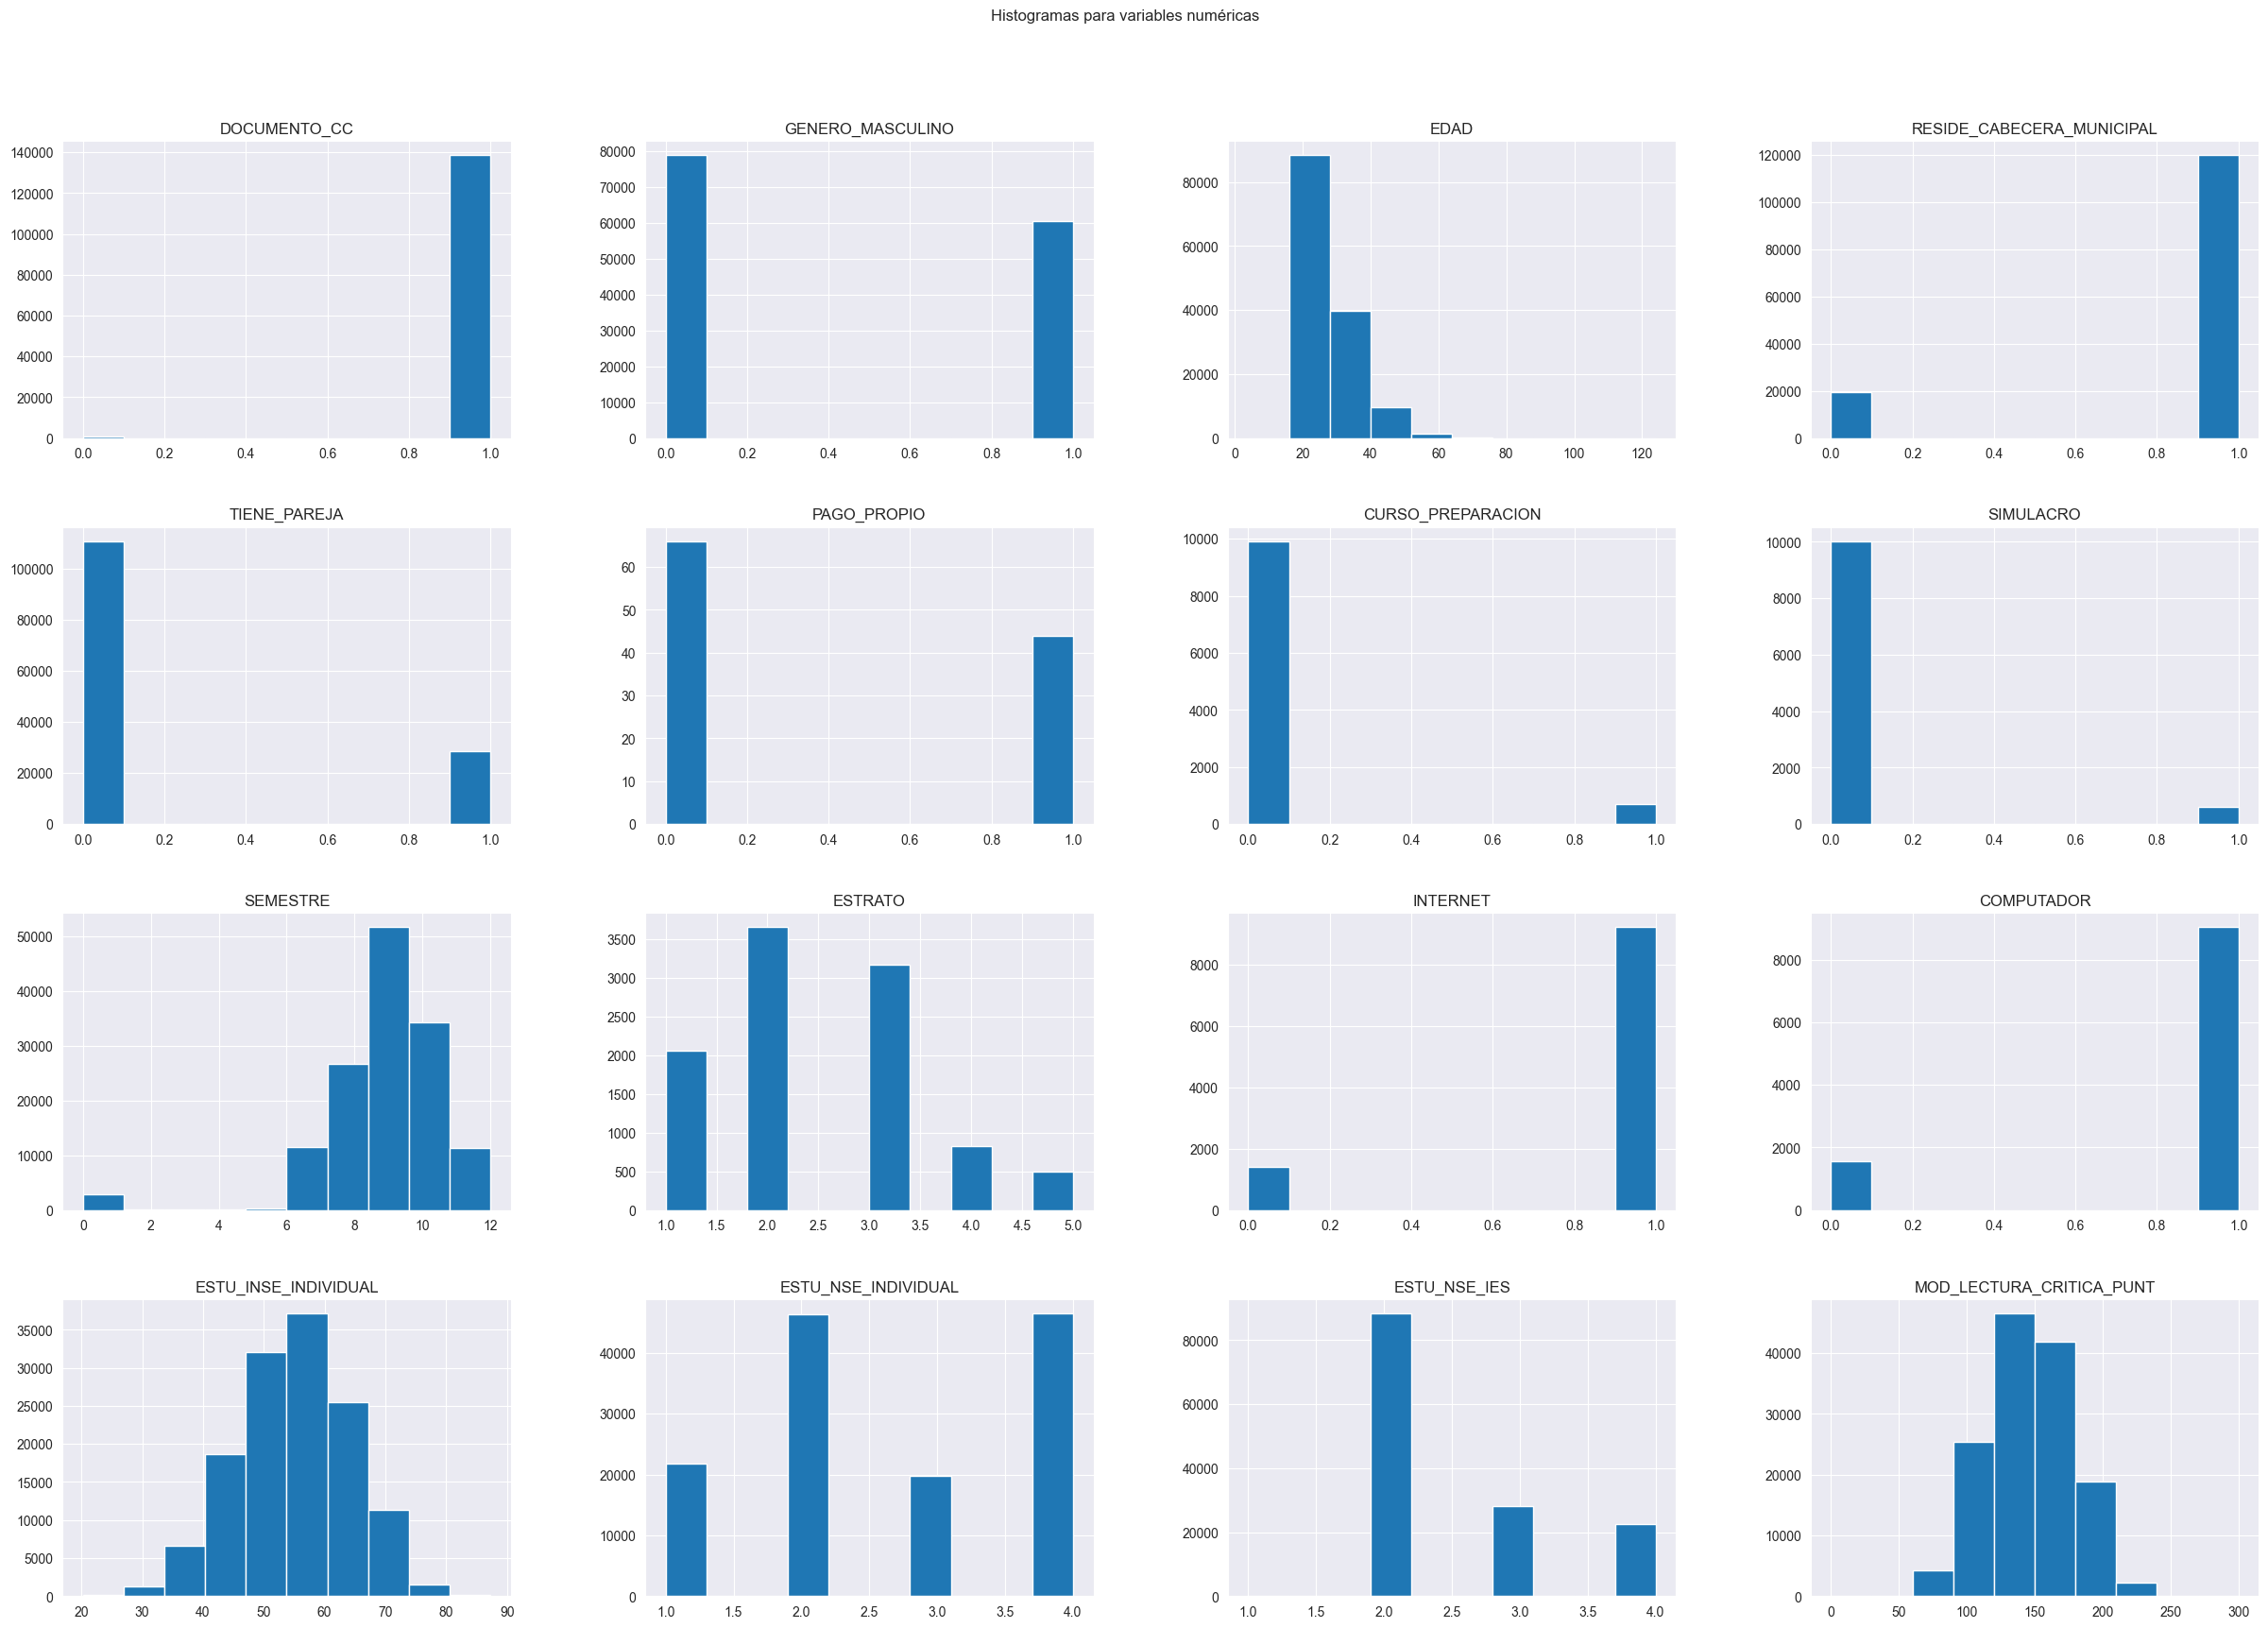

In [25]:
dataFrame[numericColumns].hist(figsize=(30, 20))
plt.suptitle('Histogramas para variables numéricas', y=0.95)
plt.show()

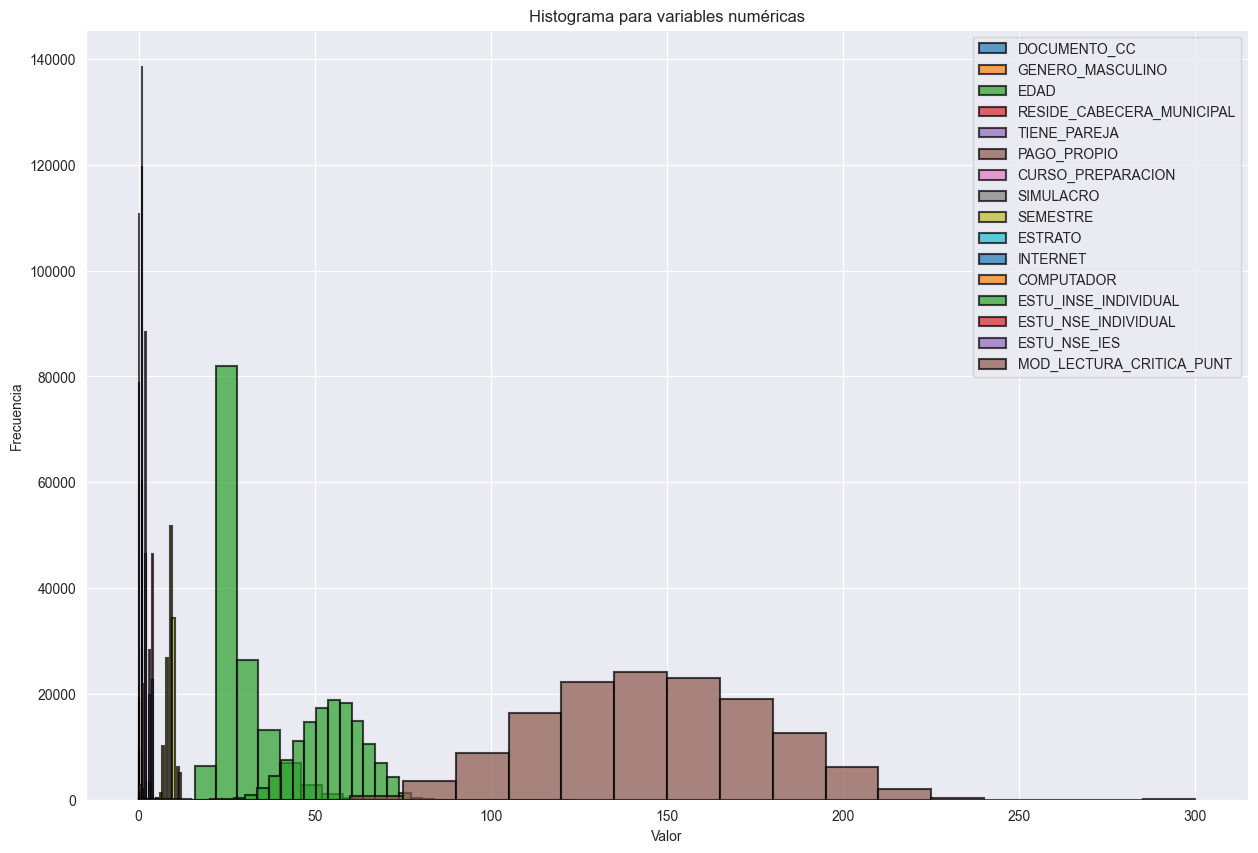

In [6]:
plt.figure(figsize=(15, 10))
for column in numericColumns:
    plt.hist(dataFrame[column], alpha=0.7, bins=20, edgecolor='black', linewidth=1.5, label=column)

plt.title('Histograma para variables numéricas')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

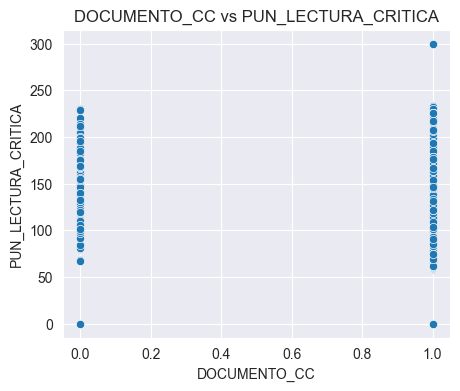

In [9]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='DOCUMENTO_CC', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('DOCUMENTO_CC vs PUN_LECTURA_CRITICA')
plt.xlabel('DOCUMENTO_CC')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

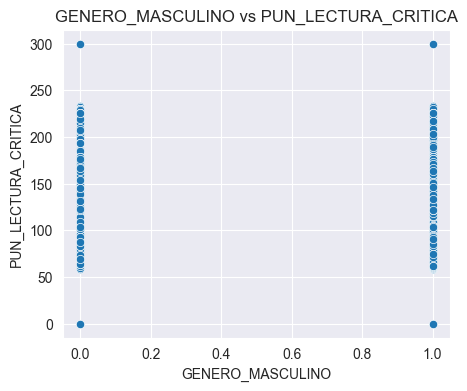

In [10]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='GENERO_MASCULINO', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('GENERO_MASCULINO vs PUN_LECTURA_CRITICA')
plt.xlabel('GENERO_MASCULINO')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

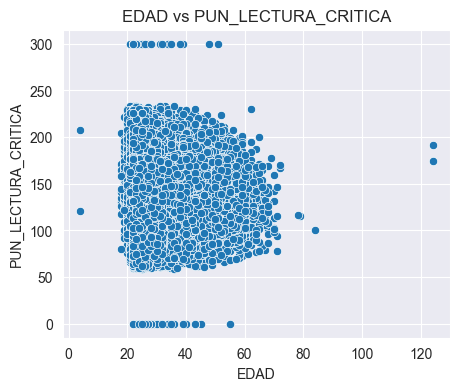

In [11]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='EDAD', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('EDAD vs PUN_LECTURA_CRITICA')
plt.xlabel('EDAD')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

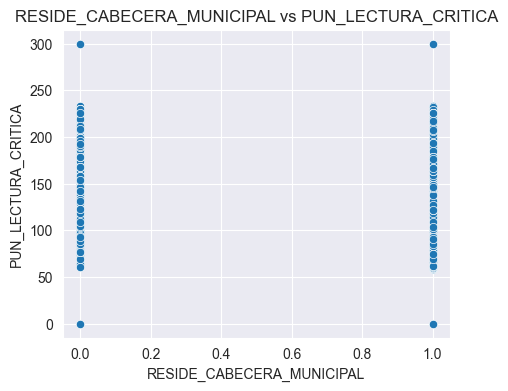

In [12]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='RESIDE_CABECERA_MUNICIPAL', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('RESIDE_CABECERA_MUNICIPAL vs PUN_LECTURA_CRITICA')
plt.xlabel('RESIDE_CABECERA_MUNICIPAL')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

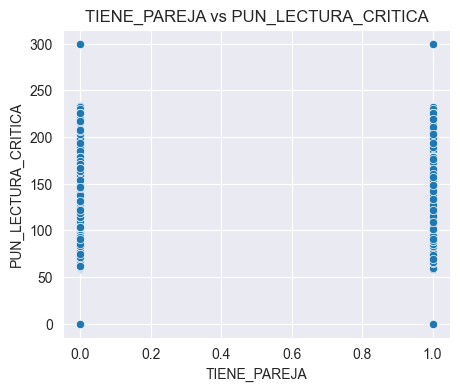

In [13]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='TIENE_PAREJA', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('TIENE_PAREJA vs PUN_LECTURA_CRITICA')
plt.xlabel('TIENE_PAREJA')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

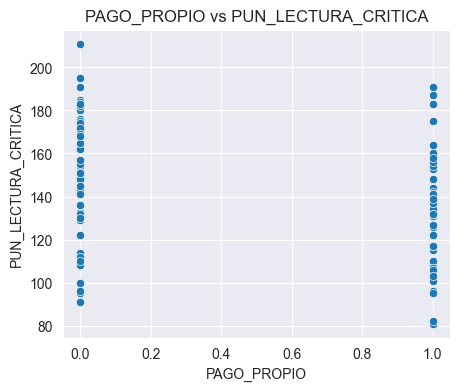

In [14]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='PAGO_PROPIO', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('PAGO_PROPIO vs PUN_LECTURA_CRITICA')
plt.xlabel('PAGO_PROPIO')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

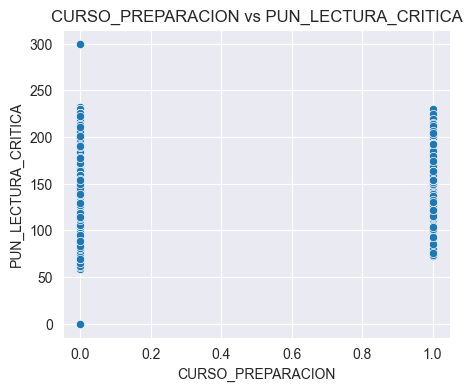

In [15]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='CURSO_PREPARACION', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('CURSO_PREPARACION vs PUN_LECTURA_CRITICA')
plt.xlabel('CURSO_PREPARACION')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

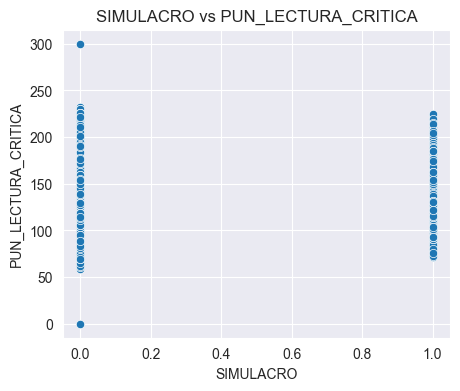

In [16]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='SIMULACRO', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('SIMULACRO vs PUN_LECTURA_CRITICA')
plt.xlabel('SIMULACRO')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

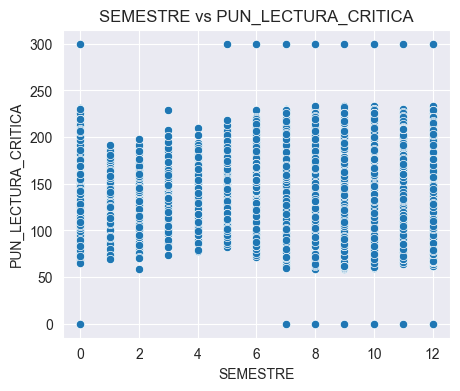

In [17]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='SEMESTRE', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('SEMESTRE vs PUN_LECTURA_CRITICA')
plt.xlabel('SEMESTRE')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

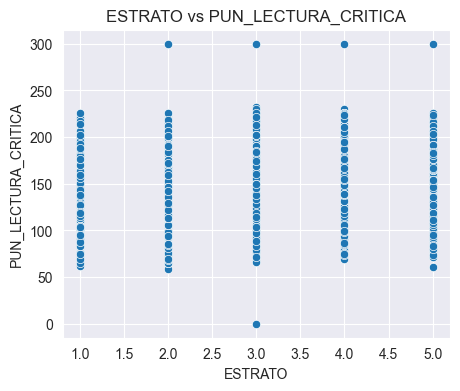

In [18]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='ESTRATO', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('ESTRATO vs PUN_LECTURA_CRITICA')
plt.xlabel('ESTRATO')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

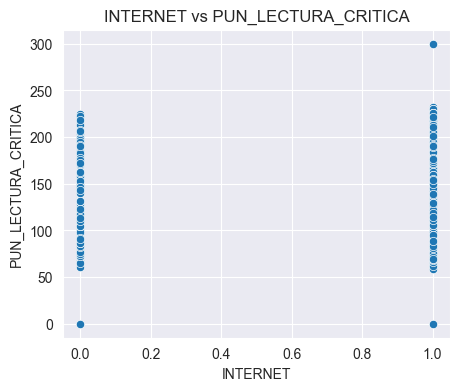

In [19]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='INTERNET', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('INTERNET vs PUN_LECTURA_CRITICA')
plt.xlabel('INTERNET')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

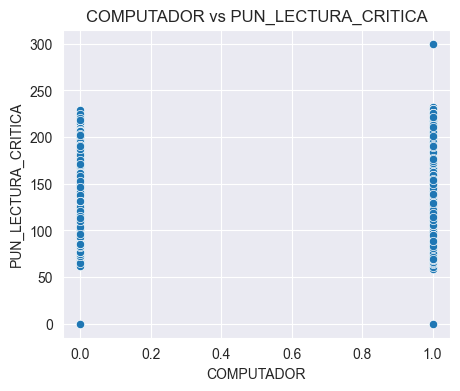

In [20]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='COMPUTADOR', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('COMPUTADOR vs PUN_LECTURA_CRITICA')
plt.xlabel('COMPUTADOR')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

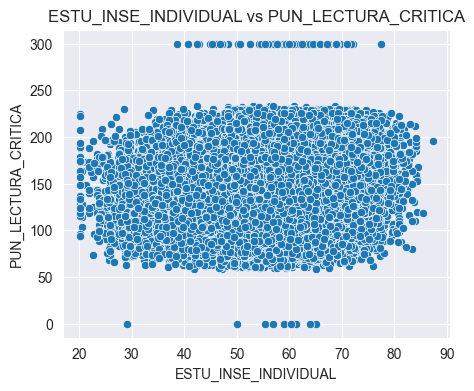

In [21]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='ESTU_INSE_INDIVIDUAL', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('ESTU_INSE_INDIVIDUAL vs PUN_LECTURA_CRITICA')
plt.xlabel('ESTU_INSE_INDIVIDUAL')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

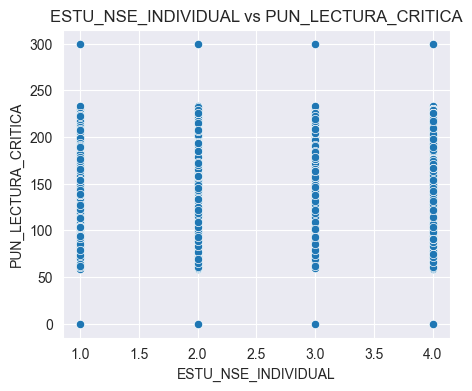

In [22]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='ESTU_NSE_INDIVIDUAL', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('ESTU_NSE_INDIVIDUAL vs PUN_LECTURA_CRITICA')
plt.xlabel('ESTU_NSE_INDIVIDUAL')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

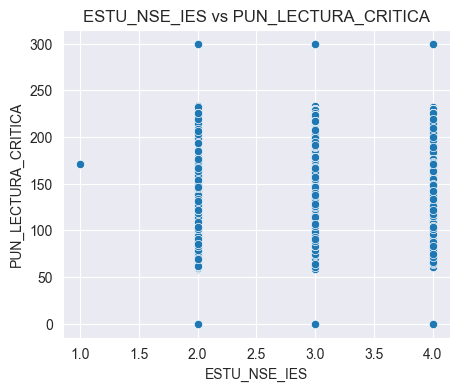

In [24]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='ESTU_NSE_IES', y='MOD_LECTURA_CRITICA_PUNT')
plt.title('ESTU_NSE_IES vs PUN_LECTURA_CRITICA')
plt.xlabel('ESTU_NSE_IES')
plt.ylabel('PUN_LECTURA_CRITICA')
plt.show()

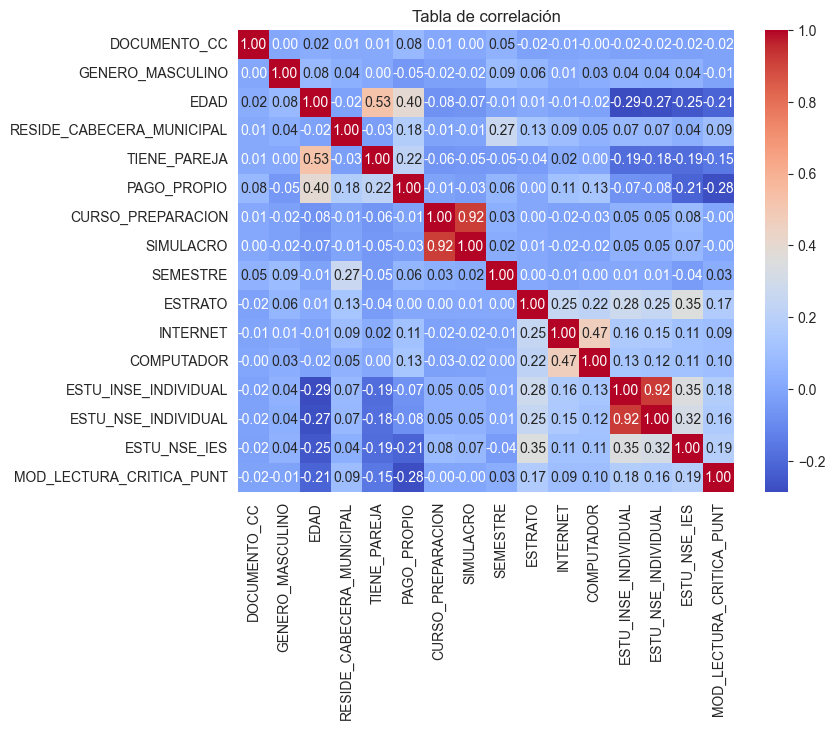

In [7]:
corr = dataFrame.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tabla de correlación')
plt.show()

Variables seleccionadas -> "PAGO_PROPIO", "EDAD", "ESTU_NSE_IES", "ESTRATO", "ESTU_NSE_INDIVIDUAL"

## 2.1.2 Are there nulls? How should they be imputed?

Yes, there are several null values, the least erroneous way to impute them is by replacing their null value with the average of the data already found.

## 2.1.3 Create dummy variables to include in the correlation

The dummy variables have already been created, they can be seen in the file "proves_saber_2023_var_exploration", and the procedure can be seen in the other file "tests_saber_2023_dummy's_elegidas"

### 2.1.4 Create a correlation, which variables have a positive effect on the score and which a negative effect

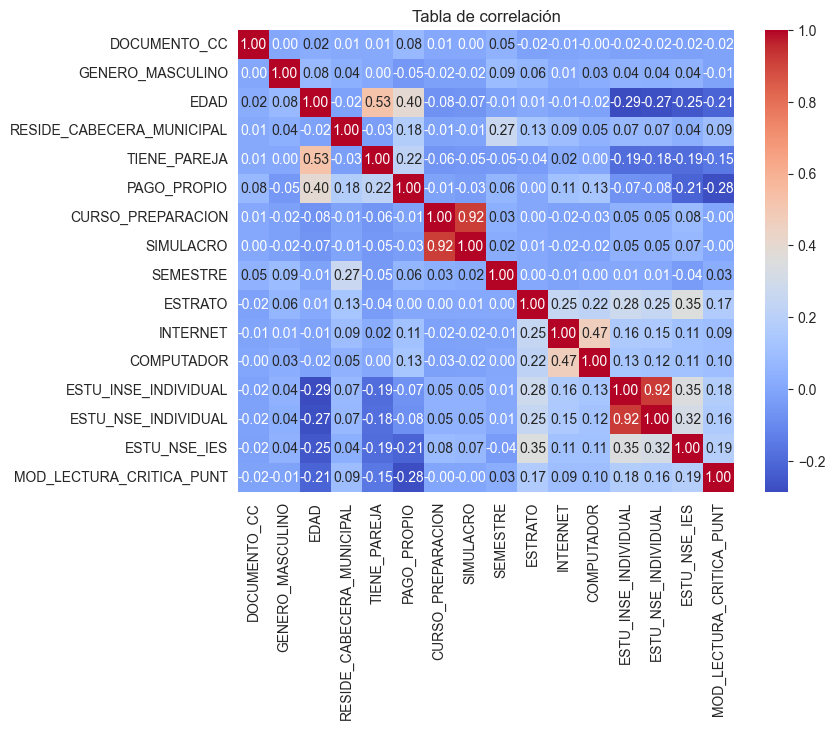

In [12]:
corr = dataFrame.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Tabla de correlación')
plt.show()

Con MOD_LECTURA_CRITICA_PUNT

corrNegativa -> DOCUMENTO_CC, GENERO_MASCULINO, EDAD, TIENE_PAREJA, PAGO_PROPIO (Hay otras que se dice negativas, pero son de valor 0.00)
corrPositiva -> RESIDE_CABECERA_MUNICIPAL, SEMESTRE, ESTRATO, INTERNET, COMPUTADOR, ESTU_INSE_INDIVIDUAL, ESTU_NSE_INDIVIDUAL, ESTU_NSE_IES

## 2.2 Split the data into training and testing

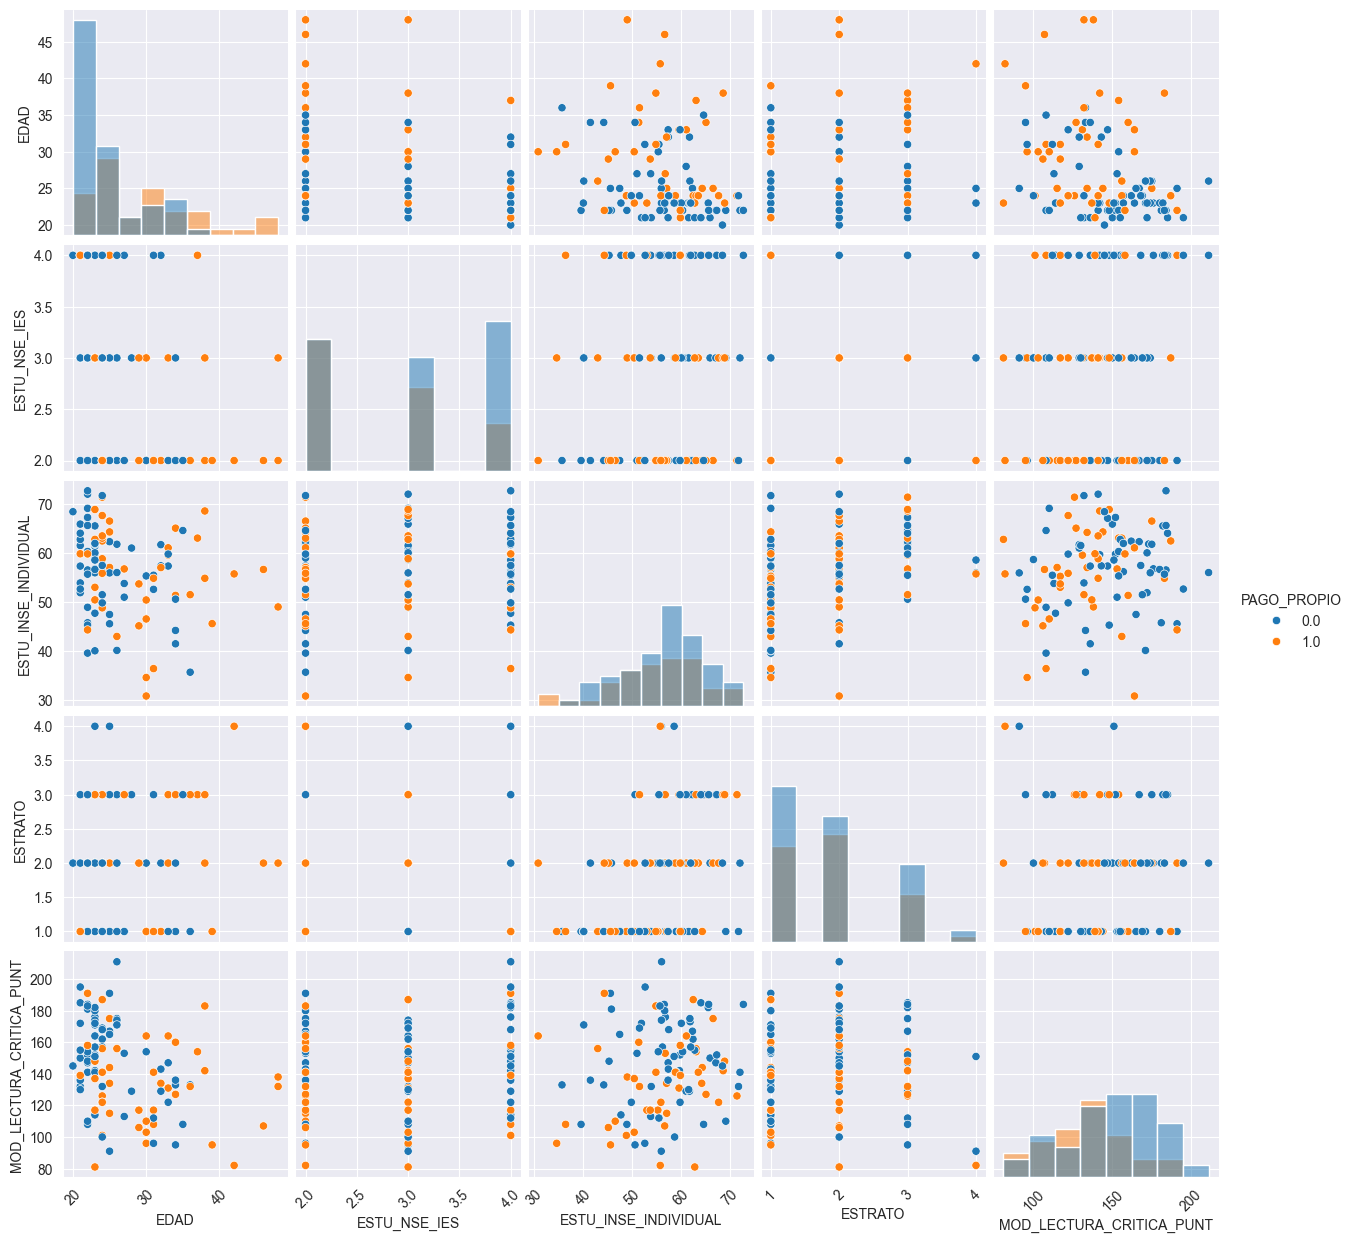

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')

oldDf = pd.read_excel("./data/point2/pruebas_saber_2023_var_exploration.xlsx")
df = oldDf[['PAGO_PROPIO', 'EDAD', 'ESTU_NSE_IES', 'ESTU_INSE_INDIVIDUAL', 'ESTRATO', 'MOD_LECTURA_CRITICA_PUNT']]
graf = sns.pairplot(df, hue = 'PAGO_PROPIO', diag_kind = "hist")
for ax in graf.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation = 45)

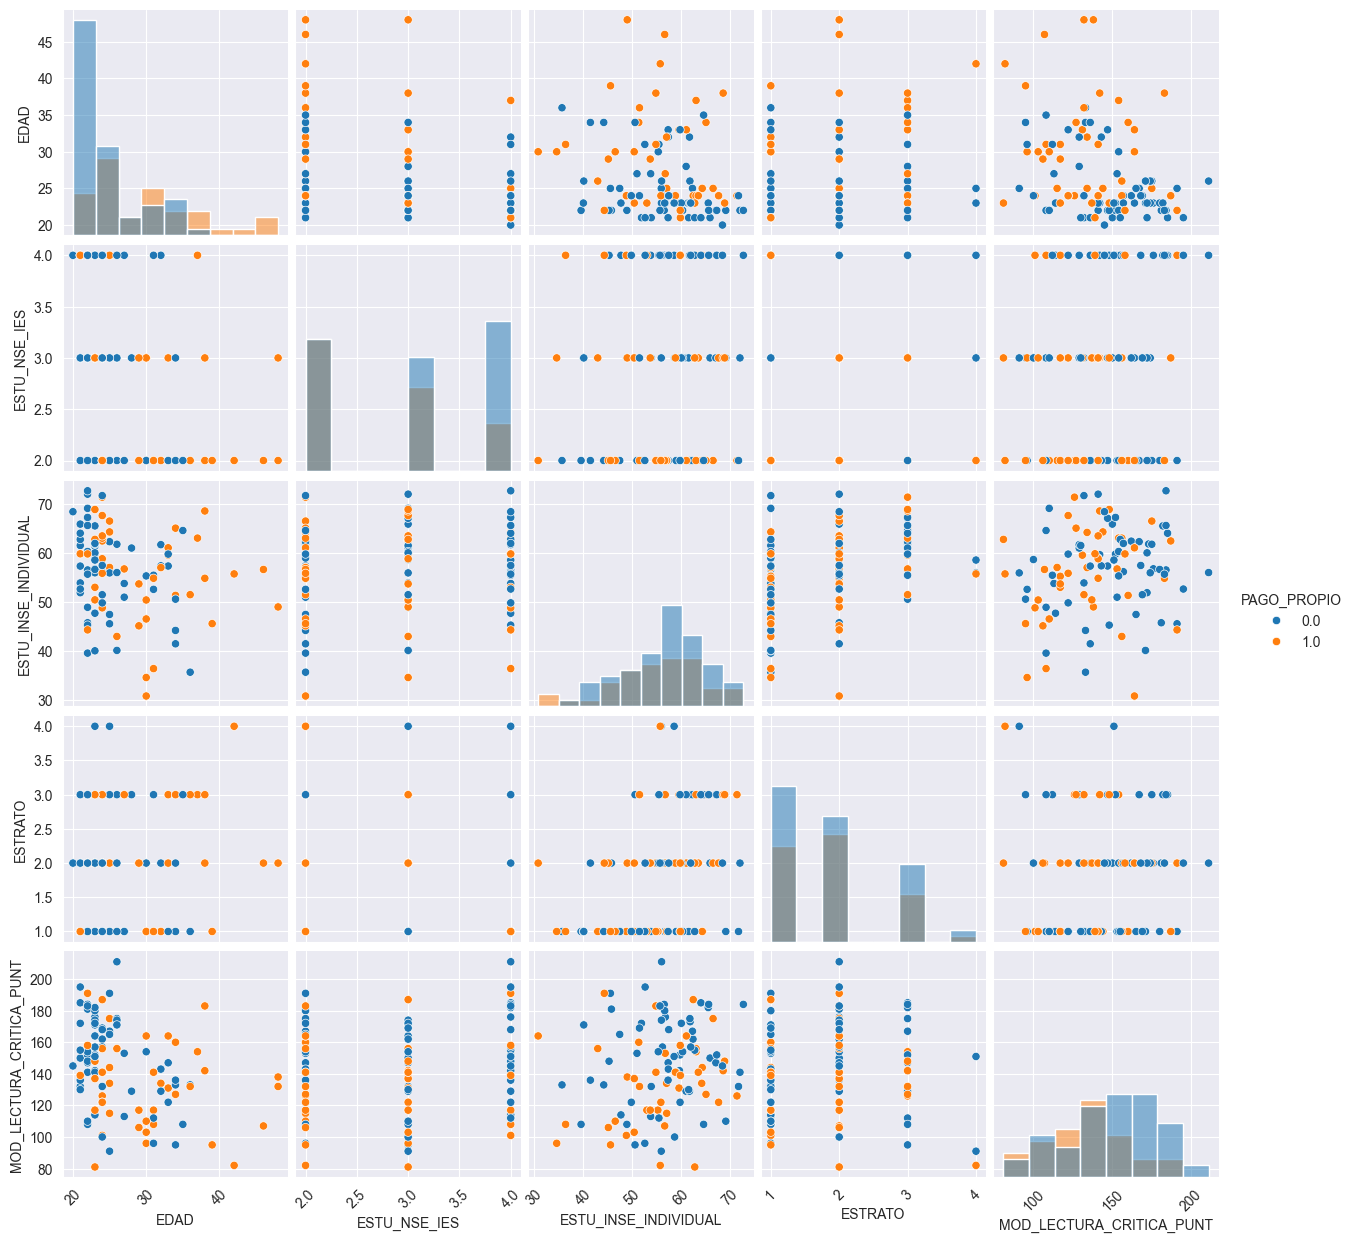

In [28]:
oldDfTrainig = pd.read_excel("./data/point2/training.xlsx")
dfTrainig = oldDfTrainig[['PAGO_PROPIO', 'EDAD', 'ESTU_NSE_IES', 'ESTU_INSE_INDIVIDUAL', 'ESTRATO', 'MOD_LECTURA_CRITICA_PUNT']]
grafTrainig = sns.pairplot(dfTrainig, hue = 'PAGO_PROPIO', diag_kind = "hist")
for ax in grafTrainig.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation = 45)

In [31]:
dfTrainig = dfTrainig.replace(np.nan, "0")

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

pagoPropio = dfTrainig['PAGO_PROPIO'].values
edad = dfTrainig['EDAD'].values
estudianteNSE = dfTrainig['ESTU_NSE_IES'].values
estudianteINSEIndividual = dfTrainig['ESTU_INSE_INDIVIDUAL'].values
estrato = dfTrainig['ESTRATO'].values
puntajeLecCritica = dfTrainig['MOD_LECTURA_CRITICA_PUNT'].values

x = np.array([edad, estudianteNSE, estudianteINSEIndividual,estrato]).T

imputer = SimpleImputer(strategy='mean')
# x imputed
x = imputer.fit_transform(x)

y = puntajeLecCritica

reg = LinearRegression()
reg = reg.fit(x,y)
yPredict = reg.predict(x)

In [40]:
y_nonzero = y[y != 0]
yPredict_nonzero = yPredict[y != 0]

mse = np.sqrt(mean_squared_error(y, yPredict))
mape = np.mean(np.abs((y_nonzero - yPredict_nonzero) / y_nonzero)) * 100
r2 = reg.score(x,y)
mse,mape,r2

(30.14808370632573, 18.278204329428654, 0.07226839446362443)

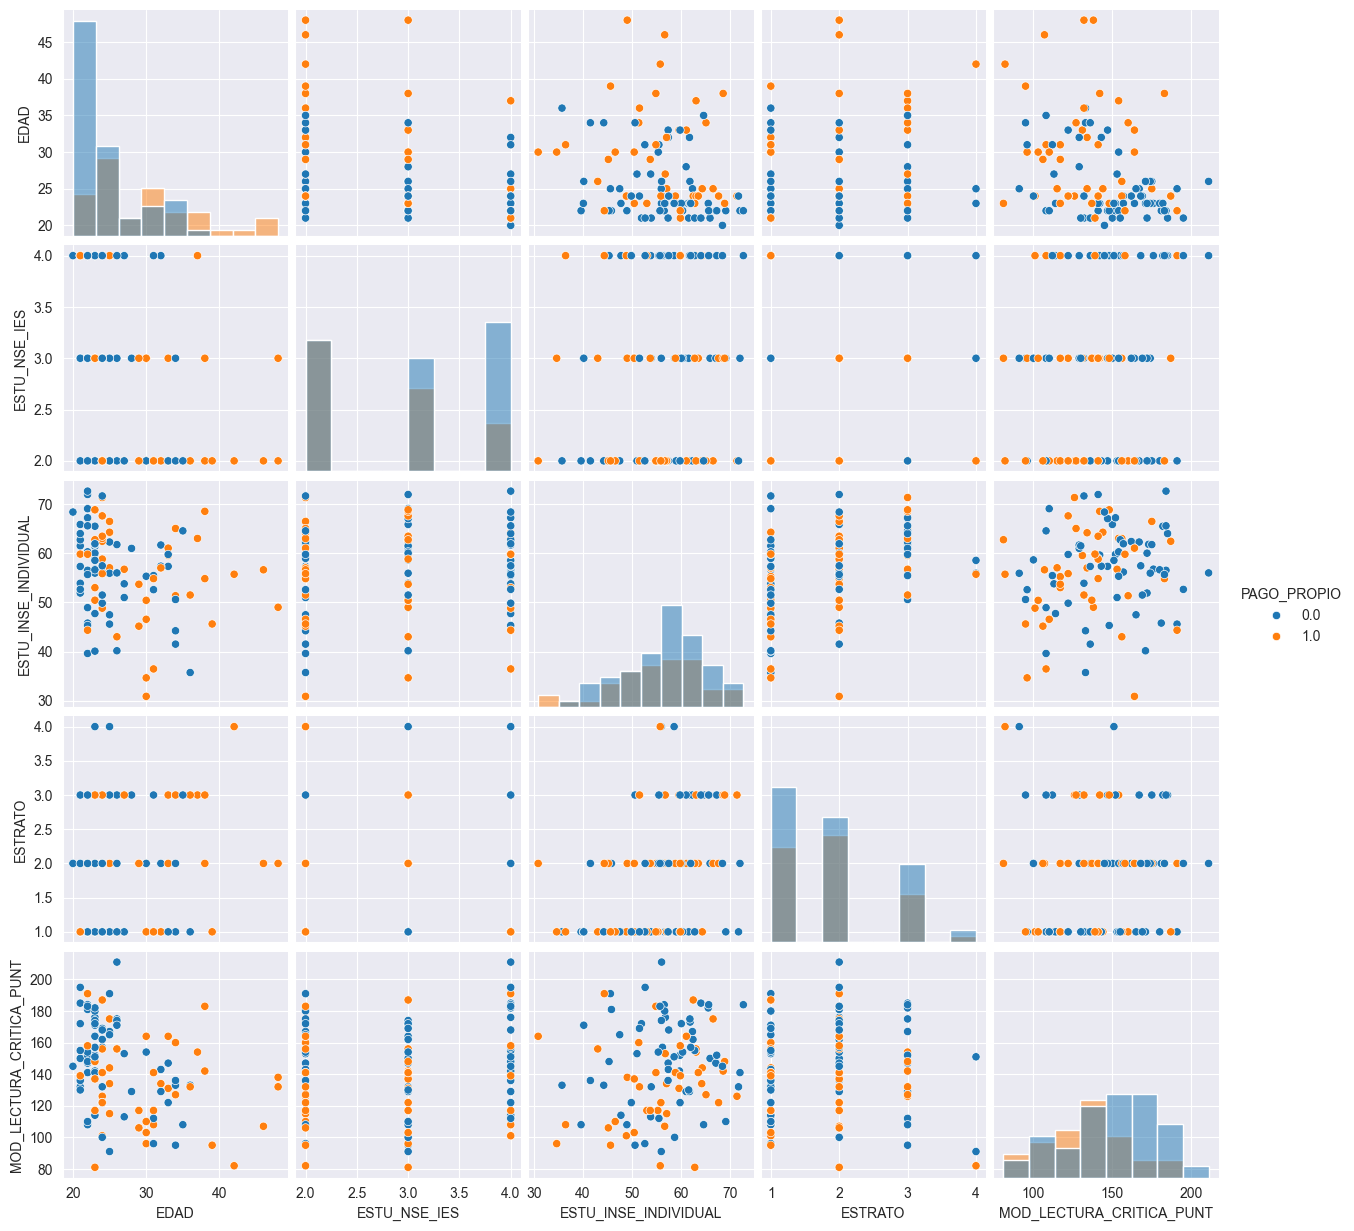

In [43]:
oldDfTest = pd.read_excel("./data/point2/test.xlsx")
dfTest = oldDfTest[['PAGO_PROPIO', 'EDAD', 'ESTU_NSE_IES', 'ESTU_INSE_INDIVIDUAL', 'ESTRATO', 'MOD_LECTURA_CRITICA_PUNT']]
grafTest = sns.pairplot(dfTrainig, hue = 'PAGO_PROPIO', diag_kind = "hist")
for ax in grafTrainig.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation = 45)

In [45]:
dfTest = dfTest.replace(np.nan, "0")

In [46]:
pagoPropio = dfTest['PAGO_PROPIO'].values
edad = dfTest['EDAD'].values
estudianteNSE = dfTest['ESTU_NSE_IES'].values
estudianteINSEIndividual = dfTest['ESTU_INSE_INDIVIDUAL'].values
estrato = dfTest['ESTRATO'].values
puntajeLecCritica = dfTest['MOD_LECTURA_CRITICA_PUNT'].values

xTest = np.array([edad, estudianteNSE, estudianteINSEIndividual,estrato]).T

# x imputed
xTest = imputer.fit_transform(xTest)
yTest = puntajeLecCritica
yPredict = reg.predict(xTest)  

In [49]:
yTest_nonzero = yTest[yTest != 0]
yPredict_nonzero = yPredict[yTest != 0]

mse = np.sqrt(mean_squared_error(yTest, yPredict))
mape = np.mean(np.abs((yTest_nonzero - yPredict_nonzero) / yTest_nonzero)) * 100
r2 = reg.score(xTest,yTest)
mse,mape,r2

(31.556385638155557, 17.937316654766402, -0.02081321181376694)